In [2]:
# Importing all the necessary libraries

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
# Importing the dataset

df = pd.read_csv("data_science_salaries.csv")
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
# Getting info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,11087.000000,1.108700e+04,11087.000000
mean,2022.848381,1.695723e+05,149614.977631
std,0.567803,4.080311e+05,66704.329347
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,1.050000e+05,104000.000000
50%,2023.000000,1.422000e+05,142000.000000
75%,2023.000000,1.880500e+05,185900.000000
max,2024.000000,3.040000e+07,750000.000000


In [6]:
# Checking for null values

df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

<ipython-input-92-bcfa55b830fb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


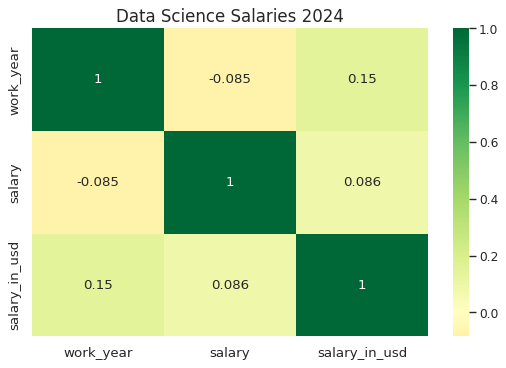

In [92]:
# Correlation Plot
plt.figure(figsize=(8,5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Data Science Salaries 2024', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
# Finding unique values of each attribute

df[["job_title", "experience_level", "employment_type","work_models","employee_residence","company_location","company_size"]].nunique()

job_title             132
experience_level        4
employment_type         4
work_models             3
employee_residence     87
company_location       75
company_size            3
dtype: int64

In [9]:
# Printing the number of duplicate rows

duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 4488


In [10]:
# Dropping duplicate records from the dataset

df_wd = df.drop_duplicates()

In [11]:
df_wd.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [12]:
df_wd["work_year"].unique()

array([2024, 2023, 2022, 2021, 2020])

### How does the salary for entry level data scientist located in united states has varied over the year.





In [13]:
df_2 = df_wd.groupby(['job_title', 'experience_level','employee_residence']).get_group(('Data Scientist', 'Entry-level','United States'))

In [14]:
df_q1 = df_2.drop(['employment_type', 'work_models', 'salary', 'salary_currency', 'company_location', 'company_size'], axis = 1)
df_q1.head()

,job_title,experience_level,work_year,employee_residence,salary_in_usd
675,Data Scientist,Entry-level,2023,United States,100000
676,Data Scientist,Entry-level,2023,United States,70000
709,Data Scientist,Entry-level,2023,United States,113800
710,Data Scientist,Entry-level,2023,United States,63200
1095,Data Scientist,Entry-level,2023,United States,150000


In [15]:
grouped_df = df_q1.groupby('work_year')['salary_in_usd'].sum().reset_index()

# Displaying the resulting DataFrame
print(grouped_df)

   work_year  salary_in_usd
0       2020         105000
1       2021         428000
2       2022        1319774
3       2023        4186667


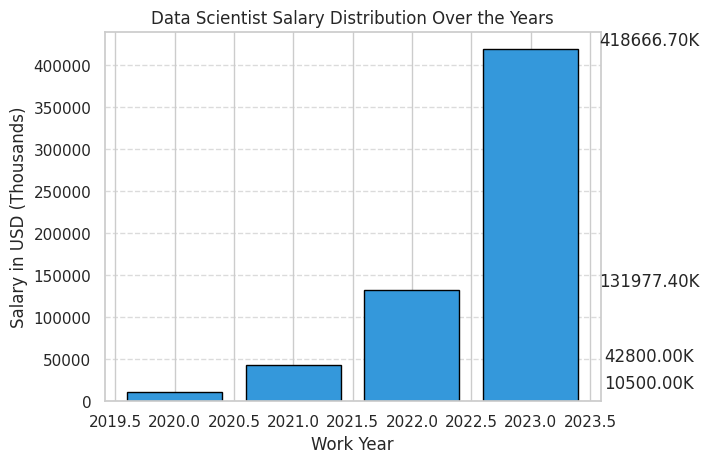

In [16]:
# Plotting the histogram
grouped_df['salary_in_thousands'] = grouped_df['salary_in_usd'] / 10

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plotting histogram with custom color
plt.bar(grouped_df['work_year'], grouped_df['salary_in_thousands'], color='#3498db', edgecolor='black')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels and title
plt.xlabel('Work Year')
plt.ylabel('Salary in USD (Thousands)')
plt.title('Data Scientist Salary Distribution Over the Years')

# Adding data labels on each bar
for i, value in enumerate(grouped_df['salary_in_thousands']):
    plt.text(df['work_year'][i], value + 0.1, f'{value:.2f}K', ha='center', va='bottom')

# Displaying the plot
plt.show()





*   Average Salary for Entry-level Data Scientist vs Data Analyst vs Data Engineer in US









In [17]:
# Preparing the data

df_ds = df_wd[(df_wd['job_title'] == 'Data Scientist') & (df_wd["employee_residence"] == "United States")]
entry_level_ds = df_ds[df_ds['experience_level'] == 'Entry-level']

df_da = df_wd[(df_wd['job_title'] == 'Data Analyst') & (df_wd["employee_residence"] == "United States")]
entry_level_da = df_da[df_da['experience_level'] == 'Entry-level']

df_de = df_wd[(df_wd['job_title'] == 'Data Engineer') & (df_wd["employee_residence"] == "United States")]
entry_level_de = df_de[df_de['experience_level'] == 'Entry-level']

In [18]:
entry_level_ds.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
675,Data Scientist,Entry-level,Full-time,On-site,2023,United States,100000,USD,100000,United States,Medium
676,Data Scientist,Entry-level,Full-time,On-site,2023,United States,70000,USD,70000,United States,Medium
709,Data Scientist,Entry-level,Full-time,On-site,2023,United States,113800,USD,113800,United States,Medium
710,Data Scientist,Entry-level,Full-time,On-site,2023,United States,63200,USD,63200,United States,Medium
1095,Data Scientist,Entry-level,Full-time,On-site,2023,United States,150000,USD,150000,United States,Medium


In [19]:
entry_level_da.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
24,Data Analyst,Entry-level,Full-time,On-site,2024,United States,115000,USD,115000,United States,Medium
25,Data Analyst,Entry-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium
34,Data Analyst,Entry-level,Full-time,On-site,2024,United States,195500,USD,195500,United States,Medium
35,Data Analyst,Entry-level,Full-time,On-site,2024,United States,68000,USD,68000,United States,Medium
141,Data Analyst,Entry-level,Full-time,On-site,2024,United States,99900,USD,99900,United States,Medium


In [20]:
entry_level_de.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
1391,Data Engineer,Entry-level,Full-time,Remote,2023,United States,60000,USD,60000,United States,Medium
1392,Data Engineer,Entry-level,Full-time,Remote,2023,United States,48000,USD,48000,United States,Medium
2457,Data Engineer,Entry-level,Full-time,Remote,2023,United States,85000,USD,85000,United States,Medium
2458,Data Engineer,Entry-level,Full-time,Remote,2023,United States,61800,USD,61800,United States,Medium
2489,Data Engineer,Entry-level,Full-time,On-site,2023,United States,88000,USD,88000,United States,Medium


In [21]:
entry_level_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,58.0,2022.551724,0.729634,2020.0,2022.0,2023.0,2023.0,2023.0
salary,58.0,104128.293103,36006.493239,24000.0,75905.0,100000.0,130000.0,190000.0
salary_in_usd,58.0,104128.293103,36006.493239,24000.0,75905.0,100000.0,130000.0,190000.0


In [22]:
entry_level_da.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,123.0,2023.056911,0.760725,2020.0,2023.0,2023.0,2023.0,2024.0
salary,123.0,87606.886179,34407.054264,34320.0,61500.0,82400.0,103000.0,203000.0
salary_in_usd,123.0,87769.845528,34221.962467,34320.0,61500.0,82400.0,103000.0,203000.0


In [23]:
entry_level_de.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,37.0,2022.648649,0.587661,2021.0,2022.0,2023.0,2023.0,2023.0
salary,37.0,97954.756757,39795.155270,48000.0,65000.0,85000.0,125000.0,220000.0
salary_in_usd,37.0,97954.756757,39795.155270,48000.0,65000.0,85000.0,125000.0,220000.0


In [24]:
avg_ds = entry_level_ds['salary_in_usd'].mean()
print('Average salary for Entry level Data Scientist: ',avg_ds)

Average salary for Entry level Data Scientist:  104128.29310344828


In [25]:
avg_da = entry_level_da['salary_in_usd'].mean()
print('Average salary for Entry level Data Analyst: ',avg_da)

Average salary for Entry level Data Analyst:  87769.84552845529


In [26]:
avg_de = entry_level_de['salary_in_usd'].mean()
print('Average salary for Entry level Data Engineer: ',avg_de)

Average salary for Entry level Data Engineer:  97954.75675675676


In [27]:
entry_level_da

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
24,Data Analyst,Entry-level,Full-time,On-site,2024,United States,115000,USD,115000,United States,Medium
25,Data Analyst,Entry-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium
34,Data Analyst,Entry-level,Full-time,On-site,2024,United States,195500,USD,195500,United States,Medium
35,Data Analyst,Entry-level,Full-time,On-site,2024,United States,68000,USD,68000,United States,Medium
141,Data Analyst,Entry-level,Full-time,On-site,2024,United States,99900,USD,99900,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
10825,Data Analyst,Entry-level,Full-time,Remote,2021,United States,90000,USD,90000,United States,Small
10826,Data Analyst,Entry-level,Full-time,Remote,2021,United States,60000,USD,60000,United States,Small
10832,Data Analyst,Entry-level,Full-time,Remote,2021,United States,80000,USD,80000,United States,Medium
11025,Data Analyst,Entry-level,Full-time,Remote,2020,United States,91000,USD,91000,United States,Large


In [28]:
# Group by two columns
grp = df_wd.groupby(['experience_level', 'employee_residence']).get_group(('Entry-level', 'United States'))

# Group by job title within the previous group and calculate average salary
grp_title = grp.groupby(['job_title']).agg(Average_Salary=('salary_in_usd', 'mean')).reset_index()

# Print the result
print(grp_title)

                             job_title  Average_Salary
0                         AI Developer   130000.000000
1                         AI Scientist    50000.000000
2                   Analytics Engineer   115930.000000
3                    Applied Scientist   180420.000000
4                           BI Analyst    76000.000000
5                      BI Data Analyst    56000.000000
6                     BI Data Engineer    60000.000000
7                         BI Developer   100650.000000
8                    Big Data Engineer    70000.000000
9                Business Data Analyst    74000.000000
10       Business Intelligence Analyst    84687.900000
11  Business Intelligence Data Analyst    99000.000000
12             Compliance Data Analyst    60000.000000
13            Computer Vision Engineer   172500.000000
14   Computer Vision Software Engineer    70000.000000
15                        Data Analyst    87769.845528
16                      Data Developer    60000.000000
17        

In [29]:
average_salary_by_job_title = pd.DataFrame(grp_title)
average_salary_by_job_title.head()

,job_title,Average_Salary
0,AI Developer,130000.0
1,AI Scientist,50000.0
2,Analytics Engineer,115930.0
3,Applied Scientist,180420.0
4,BI Analyst,76000.0


In [30]:
# Average salary of entry level Data scientist, Data Analyst, Data engineer in US

a = average_salary_by_job_title.loc[average_salary_by_job_title['job_title'].isin(['Data Scientist', 'Data Analyst', 'Data Engineer'])]
a


,job_title,Average_Salary
15,Data Analyst,87769.845528
17,Data Engineer,97954.756757
22,Data Scientist,104128.293103


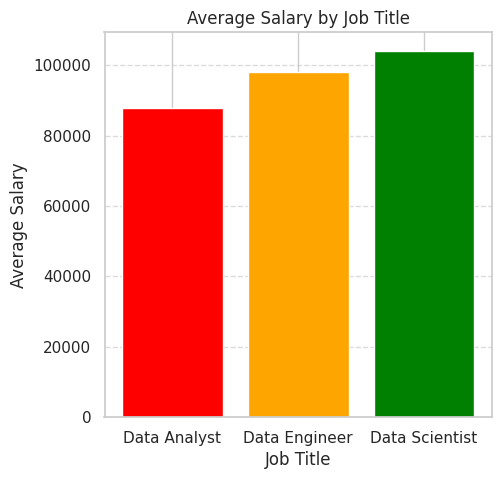

In [31]:
# Plotting the average salary of entry level Data scientist, Data Analyst, Data engineer in US

plt.figure(figsize=(5, 5))
plt.bar(a['job_title'], a['Average_Salary'], color=['red', 'orange', 'green'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title')



# Adding grid lines for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



*   Top 5 Job titles and their average salary



In [32]:
top_5_salaries = average_salary_by_job_title.sort_values(by="Average_Salary", ascending=False).head(5)
top_5_salaries

,job_title,Average_Salary
30,Machine Learning Scientist,225000.000000
3,Applied Scientist,180420.000000
28,Machine Learning Developer,180000.000000
13,Computer Vision Engineer,172500.000000
33,Research Engineer,162818.181818


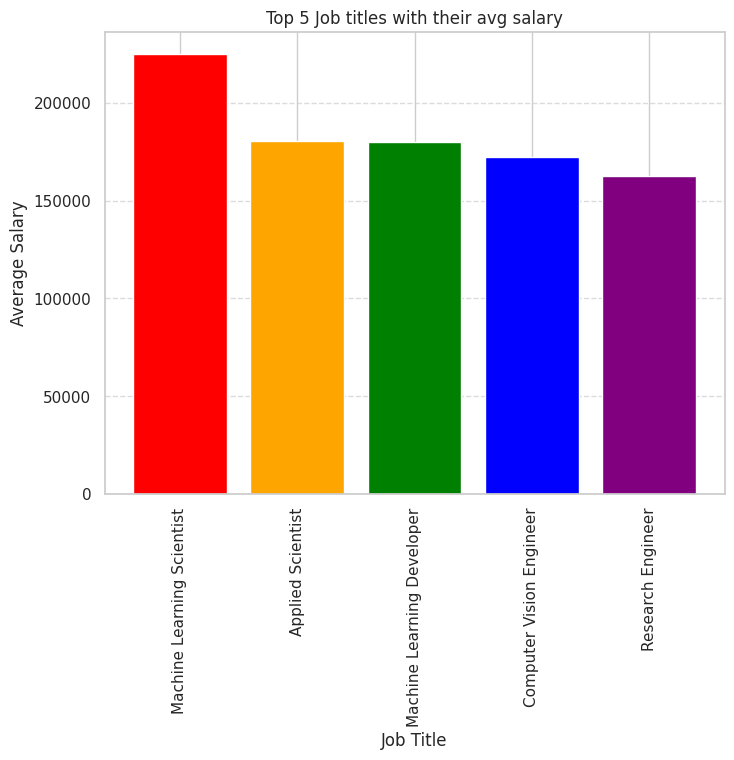

In [33]:
# Plotting the top 5 Job titles and their average salary
plt.figure(figsize=(8, 6))
plt.bar(top_5_salaries['job_title'], top_5_salaries['Average_Salary'], color=['red', 'orange', 'green', 'blue', 'purple'])
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
plt.title('Top 5 Job titles with their avg salary')


# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



   
### **Predicting Salaries for Entry level Data Analyst for next 6 years**


In [34]:
# Preparing data for predicting the salary
df_da1 = df_wd[(df_wd['job_title'] == 'Data Analyst') & (df_wd["employee_residence"] == "United States") & (df_wd["employment_type"] == "Full-time") & (df_wd["company_location"] == "United States")]
df_da1.head(3)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
24,Data Analyst,Entry-level,Full-time,On-site,2024,United States,115000,USD,115000,United States,Medium
25,Data Analyst,Entry-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium
34,Data Analyst,Entry-level,Full-time,On-site,2024,United States,195500,USD,195500,United States,Medium


In [35]:
df_da1 = df_da1.drop('company_location', axis=1)

In [36]:
df_da1.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_size
24,Data Analyst,Entry-level,Full-time,On-site,2024,United States,115000,USD,115000,Medium
25,Data Analyst,Entry-level,Full-time,On-site,2024,United States,85000,USD,85000,Medium
34,Data Analyst,Entry-level,Full-time,On-site,2024,United States,195500,USD,195500,Medium
35,Data Analyst,Entry-level,Full-time,On-site,2024,United States,68000,USD,68000,Medium
52,Data Analyst,Senior-level,Full-time,On-site,2024,United States,175520,USD,175520,Medium


In [37]:
df_da1.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_size'],
      dtype='object')

In [38]:
df_da_lr = df_da1.drop(['employee_residence','salary','salary_currency','job_title'], axis = 1)

In [39]:
df_da_lr.head()

,experience_level,employment_type,work_models,work_year,salary_in_usd,company_size
24,Entry-level,Full-time,On-site,2024,115000,Medium
25,Entry-level,Full-time,On-site,2024,85000,Medium
34,Entry-level,Full-time,On-site,2024,195500,Medium
35,Entry-level,Full-time,On-site,2024,68000,Medium
52,Senior-level,Full-time,On-site,2024,175520,Medium


In [40]:
# Preparing data for OneHotEncoder
numerical_features = ['work_year']
categorical_features = ['experience_level', 'employment_type','work_models','company_size']
target = 'salary_in_usd'

In [41]:
# Extract features and target variable
X = df_da_lr[numerical_features + categorical_features]
y = df_da_lr[target]

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create a transformer for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Handle unknown categories

In [44]:
# Create a column transformer to apply transformers to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [45]:
# Create a pipeline with preprocessing and the Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [46]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'work_models',
                                                   'company_size'])])),
                ('regressor', LinearRegression())])

In [47]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1709196637.6912751


In [49]:
# Create a DataFrame with the relevant features for prediction
new_data_range = pd.DataFrame({
    'work_year': range(2025, 2031),          # Range of years from 2025 to 2030
    'experience_level': ['Entry-level'] * 6,  # Repeated for each year
    'employment_type': ['Full-time'] * 6,     # Repeated for each year
    'work_models': ['On-site'] * 6,           # Repeated for each year
    'company_size': ['Medium'] * 6             # Repeated for each year
})

In [50]:
# Ensuring the order and names of features match the training data
new_data_range = new_data_range[['work_year', 'experience_level', 'employment_type', 'work_models', 'company_size']]

In [51]:
# Predicting the salaries for the range of years
predicted_salaries = model.predict(new_data_range)

In [52]:
# Creating a DataFrame to display the results
results_df = pd.DataFrame({
    'Year': new_data_range['work_year'],
    'Predicted_Salary': predicted_salaries
})

In [53]:
# Printing the predicted salary
print(results_df)

   Year  Predicted_Salary
0  2025           90496.0
1  2026           90752.0
2  2027           91008.0
3  2028           91392.0
4  2029           91648.0
5  2030           91904.0






###  **Predicting Salaries for Entry level Data Scientit for next 6 years** **









In [54]:
entry_level_ds_pred = entry_level_ds[entry_level_ds['employment_type'] == 'Full-time']

In [55]:
entry_level_ds_pred.head(3)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
675,Data Scientist,Entry-level,Full-time,On-site,2023,United States,100000,USD,100000,United States,Medium
676,Data Scientist,Entry-level,Full-time,On-site,2023,United States,70000,USD,70000,United States,Medium
709,Data Scientist,Entry-level,Full-time,On-site,2023,United States,113800,USD,113800,United States,Medium


In [56]:
# Deopping unnecessary attributes from a dataset
Sal_pred_ds = entry_level_ds_pred.drop(['employee_residence','salary','salary_currency','job_title','company_location'], axis = 1)

In [57]:
Sal_pred_ds.head(3)

,experience_level,employment_type,work_models,work_year,salary_in_usd,company_size
675,Entry-level,Full-time,On-site,2023,100000,Medium
676,Entry-level,Full-time,On-site,2023,70000,Medium
709,Entry-level,Full-time,On-site,2023,113800,Medium


In [58]:
# Preparing data for OneHotEncoder
numerical_features_ds = ['work_year']
categorical_features_ds = ['experience_level', 'employment_type','work_models','company_size']
target_ds = 'salary_in_usd'

In [59]:
# Extracting features and target variable
X_ds = Sal_pred_ds[numerical_features_ds + categorical_features_ds]
y_ds = Sal_pred_ds[target_ds]

In [60]:
# Spliting the dataset into training and testing sets
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_ds, y_ds, test_size=0.2, random_state=42)

In [61]:
# Create]ing a transformer for numerical and categorical features
numeric_transformer_ds = StandardScaler()
categorical_transformer_ds = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Handle unknown categories

In [62]:
# Creating a column transformer to apply transformers to different feature types
preprocessor_ds = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_ds, numerical_features_ds),
        ('cat', categorical_transformer_ds, categorical_features_ds)
    ])

In [63]:
# Creating a pipeline with preprocessing and the Linear Regression model
model_ds = Pipeline(steps=[
    ('preprocessor', preprocessor_ds),
    ('regressor', LinearRegression())
])

In [64]:
# Training the model
model_ds.fit(X_train_ds, y_train_ds)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'work_models',
                                                   'company_size'])])),
                ('regressor', LinearRegression())])

In [65]:
# Making predictions on the test set
predictions_ds = model_ds.predict(X_test_ds)

In [66]:
# Evaluating the model
mse_ds = mean_squared_error(y_test_ds, predictions_ds)
print(f'Mean Squared Error: {mse_ds}')

Mean Squared Error: 1015230016.5736965


In [67]:
# Creating a DataFrame with the relevant features for prediction
new_data_range_ds = pd.DataFrame({
    'work_year': range(2025, 2031),          # Range of years from 2025 to 2030
    'experience_level': ['Entry-level'] * 6,  # Repeated for each year
    'employment_type': ['Full-time'] * 6,     # Repeated for each year
    'work_models': ['On-site'] * 6,           # Repeated for each year
    'company_size': ['Medium'] * 6             # Repeated for each year
})

In [68]:
# Ensuring the order and names of features match the training data
new_data_range_ds = new_data_range_ds[['work_year', 'experience_level', 'employment_type', 'work_models', 'company_size']]

In [69]:
# Predicting the salaries for the range of years
predicted_salaries_ds = model_ds.predict(new_data_range_ds)

In [70]:
# Creating a DataFrame to display the results
results_df_ds = pd.DataFrame({
    'Year': new_data_range_ds['work_year'],
    'Predicted_Salary': predicted_salaries_ds
})

In [71]:
# Printing the predicted salary
print(results_df_ds)

   Year  Predicted_Salary
0  2025     125488.964622
1  2026     133204.613406
2  2027     140920.262189
3  2028     148635.910972
4  2029     156351.559756
5  2030     164067.208539


### **Predicting Salaries for Entry level Data Engineer for next 6 years**

In [72]:
entry_level_de.head(3)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
1391,Data Engineer,Entry-level,Full-time,Remote,2023,United States,60000,USD,60000,United States,Medium
1392,Data Engineer,Entry-level,Full-time,Remote,2023,United States,48000,USD,48000,United States,Medium
2457,Data Engineer,Entry-level,Full-time,Remote,2023,United States,85000,USD,85000,United States,Medium


In [73]:
entry_level_de_pred = entry_level_de[entry_level_de['employment_type'] == 'Full-time']

In [74]:
# Dropping unnecessary attributes to perdict salary for next 6 years
Sal_pred_de = entry_level_de_pred.drop(['employee_residence','salary','salary_currency','job_title','company_location'], axis = 1)

In [75]:
Sal_pred_de.head(3)

,experience_level,employment_type,work_models,work_year,salary_in_usd,company_size
1391,Entry-level,Full-time,Remote,2023,60000,Medium
1392,Entry-level,Full-time,Remote,2023,48000,Medium
2457,Entry-level,Full-time,Remote,2023,85000,Medium


In [76]:
# Preparing data to perform OneHotEncoder
numerical_features_de = ['work_year']
categorical_features_de = ['experience_level', 'employment_type','work_models','company_size']
target_de = 'salary_in_usd'

In [77]:
# Extracting features and target variable
X_de = Sal_pred_de[numerical_features_de + categorical_features_de]
y_de = Sal_pred_de[target_de]

In [78]:
# Spliting the dataset into training and testing sets
X_train_de, X_test_de, y_train_de, y_test_de = train_test_split(X_de, y_de, test_size=0.2, random_state=42)

In [79]:
# Creating a transformer for numerical and categorical features
numeric_transformer_de = StandardScaler()
categorical_transformer_de = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Handle unknown categories

In [80]:
# Creating a column transformer to apply transformers to different feature types
preprocessor_de = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_de, numerical_features_de),
        ('cat', categorical_transformer_de, categorical_features_de)
    ])

In [81]:
# Creating a pipeline with preprocessing and the Linear Regression model
model_de = Pipeline(steps=[
    ('preprocessor', preprocessor_de),
    ('regressor', LinearRegression())
])

In [82]:
# Training the model
model_de.fit(X_train_de, y_train_de)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'work_models',
                                                   'company_size'])])),
                ('regressor', LinearRegression())])

In [83]:
# Making predictions on the test set
predictions_de = model_de.predict(X_test_de)

In [84]:
# Evaluating the model
mse_de = mean_squared_error(y_test_de, predictions_de)
print(f'Mean Squared Error: {mse_de}')

Mean Squared Error: 785343572.5472072


In [85]:
# Creating a DataFrame with the relevant features for prediction
new_data_range_de = pd.DataFrame({
    'work_year': range(2025, 2031),          # Range of years from 2025 to 2030
    'experience_level': ['Entry-level'] * 6,  # Repeated for each year
    'employment_type': ['Full-time'] * 6,     # Repeated for each year
    'work_models': ['On-site'] * 6,           # Repeated for each year
    'company_size': ['Medium'] * 6             # Repeated for each year
})

In [86]:
# Ensuring the order and names of features match the training data
new_data_range_de = new_data_range_de[['work_year', 'experience_level', 'employment_type', 'work_models', 'company_size']]

In [87]:
# Predicting the salaries for the range of years
predicted_salaries_de = model_de.predict(new_data_range_de)

In [88]:
# Creating a DataFrame to display the results
results_df_de = pd.DataFrame({
    'Year': new_data_range_de['work_year'],
    'Predicted_Salary': predicted_salaries_de
})

In [89]:
# Printing the predicted salary
print(results_df_de)

   Year  Predicted_Salary
0  2025     102258.259259
1  2026      97776.851852
2  2027      93295.444444
3  2028      88814.037037
4  2029      84332.629630
5  2030      79851.222222
